# Winning the Trifecta: A look at Time, Place, Wager, and Risk Off-Track and Beyond…
By Elizabeth McMullen

Horse racing has always been a high-stakes sport, both for the horses themselves and for the gamblers looking to win big. For the visualizations I wanted to create, I decided to use the Illinois Racing Board datasets displaying the monthly wagers at Illinois racetracks, off-track-betting parlors, and advanced deposit wagers for the years 2011 and 2012. The data is broken-down into categories signifying the year, the month the wagers were placed, the locations they were placed at, and the total amount of the wagers. For my data visualizations, there are dropdown menus where the user can select which location they want to view, which then interacts with the scatter plot to show the corresponding month and wager amount associated with the location. To help make the data visualizations run faster, I only chose a random sample of 100.

My hope for the user is also the hope for myself: to be able to see just how much money is being wagered at any given month of the year in the state of Illinois. One can only imagine how much money is wagered in the entire United States. I also included the two visualizations created by others to illustrate statistics on horse breakdowns, otherwise known as deaths, categorized by specific racetracks.

# First Visualization!

In [243]:
#Here, I am importing the data for 2011 to work with it a try and plot some of the points with a visualization.

import pandas as pd
import bqplot
import numpy as np
import traitlets
import ipywidgets
from ipywidgets import widgets, interact
%matplotlib inline

#I found this import command from github at https://github.com/konstantint/matplotlib-venn/issues/33:
from matplotlib import pyplot as plt

In [244]:
#Importing the data.

otb_data=pd.read_csv("otb_wagers_il_2011.csv")
otb_data

,_1,_2,arlington_at_chicago_weed_street_otb,january
0,2011,3329857,"ARLINGTON AT CHICAGO, WEED STREET -OTB",JANUARY
1,2011,1467892,ARLINGTON AT HODGKINS - OTB,JANUARY
2,2011,1421410,ARLINGTON AT WAUKEGAN - OTB,JANUARY
3,2011,306946,ARLINGTON AT WAUKEGAN SUNDANCE SALOON-OTB,JANUARY
4,2011,942414,ARLINGTON PARK RACECOURSE - IT.,JANUARY
5,2011,3428912,"ARLINGTON PARK RACECOURSE, LLC.",JANUARY
6,2011,315065,BALMORAL AT CHAMPAIGN - OTB,JANUARY
7,2011,1914378,BALMORAL AT CRESTWOOD - OTB,JANUARY
8,2011,349083,BALMORAL AT NORMAL - OTB,JANUARY
9,2011,817015,"BALMORAL RACING CLUB, INC.",JANUARY


In [245]:
len(otb_data)

477

For this part, I'm going to pull out the data information in the "Wagers" column and the "Months" column and plot these figures with a visualization.


In [246]:
stats_2=otb_data.groupby('arlington_at_chicago_weed_street_otb')['_2'].describe()
stats_2

,count,mean,std,min,25%,50%,75%,max
arlington_at_chicago_weed_street_otb,,,,,,,,
"ARLINGTON AT CHICAGO, WEED STREET -OTB",12.0,3.517762e+06,4.342856e+05,3067332.0,3201323.50,3377071.0,3783655.25,4526227.0
ARLINGTON AT HODGKINS - OTB,12.0,1.526417e+06,1.884401e+05,1218062.0,1427657.00,1480835.5,1551462.00,1901464.0
ARLINGTON AT VILLA PARK,6.0,9.134242e+05,2.120771e+05,532929.0,903204.25,936919.0,985963.75,1179500.0
ARLINGTON AT WAUKEGAN - OTB,12.0,1.626272e+06,2.169719e+05,1383054.0,1460908.75,1532684.0,1823756.25,2034092.0
ARLINGTON AT WAUKEGAN SUNDANCE SALOON-OTB,9.0,4.823149e+05,1.368256e+05,306946.0,338521.00,539093.0,588179.00,671661.0
ARLINGTON PARK RACECOURSE - IT.,12.0,2.951480e+06,1.833967e+06,942414.0,1369488.00,2358254.0,4645728.50,5502607.0
"ARLINGTON PARK RACECOURSE, LLC.",7.0,9.225622e+06,5.051650e+06,881017.0,6541468.50,11347624.0,12945339.00,13377101.0
BALMORAL AT CHAMPAIGN - OTB,12.0,3.774148e+05,8.953572e+04,297464.0,325851.50,354538.0,386160.25,636286.0
BALMORAL AT CRESTWOOD - OTB,12.0,2.247332e+06,3.149962e+05,1914378.0,2096623.75,2116197.5,2238145.75,3045820.0


In [247]:
#Random sample of 100.

nsamples=100
downSampleMask=np.random.randint(0,len(otb_data)-1,nsamples)
downSampleMask

array([415, 356, 249, 457,  82,  61, 152, 196,  19,  70, 303, 219, 408,
       131, 407, 341, 204,  95,  88, 259, 331, 318, 309, 444, 107, 241,
        17, 233, 272,  47, 366, 167, 311, 306, 459, 187,  41, 212, 131,
       415, 149, 101,  90,  67,  66, 390, 110, 234, 471,  68,  33,  89,
       377, 132, 399, 212,  39, 232, 120, 452, 435, 316,  35, 352,  71,
       395, 233, 339,  74,  77,  20,  33, 241, 175, 290,  75, 214, 459,
       418, 268, 317, 150, 215, 192, 308, 348,  89, 319, 305, 160,  37,
       242, 127, 264, 357, 458, 148, 454, 238, 369])

In [248]:
downSampleMask=np.random.choice(range(len(otb_data)-1),
                               nsamples, replace=False)

In [249]:
otb_dataDS=otb_data.loc[downSampleMask]
len(otb_dataDS)

100

In [250]:
otb_dataDS

,_1,_2,arlington_at_chicago_weed_street_otb,january
384,2011,485587,MAYWOOD AT NORTH AURORA - OTB,OCTOBER
129,2011,1017164,"FAIRMOUNT PARK, INC.",APRIL
267,2011,424379,QUAD CITY AT SOUTH BELOIT - OTB,JULY
137,2011,5191028,"HAWTHORNE RACE COURSE, INC.",APRIL
406,2011,354378,BALMORAL AT NORMAL - OTB,NOVEMBER
299,2011,1004939,HAWTHORNE AT MOKENA - OTB,AUGUST
463,2011,1936095,MAYWOOD AT OAKBROOK - OTB,DECEMBER
241,2011,347938,BALMORAL AT CHAMPAIGN - OTB,JULY
239,2011,1492650,ARLINGTON PARK RACECOURSE - IT.,JULY
101,2011,2397289,MAYWOOD AT NILES - OTB,MARCH


For the two data visualizations I created, each scatter plot has 100 random samples of data, each point measuring the amount of wagers, or handles, made during each particular month. The dropdown menu on each of these visualizations includes all of the different locations. By selecting a location from the dropdown, the user can see where on the scatter plot that data is located. By sampling a smaller amount of data,the user has less of a chance feeling overwhelmed by the amount of information in the dataset.

In [251]:
#I'm now defining the scales for my scatter plot.

x_sc= bqplot.OrdinalScale()
y_sc= bqplot.OrdinalScale()
c_sc= bqplot.ColorScale()

#I'm now defining the axes.
x_ax=bqplot.Axis(scale=x_sc, label='Month')
y_ax=bqplot.Axis(scale=y_sc, label='Wager', label_location='start', orientation='vertical')
c_ax=bqplot.ColorAxis(scale=c_sc, color='blue',label='$(Thousands)', orientation='vertical', side='right')

#Selecting the marks
scatters=bqplot.Scatter(x=otb_dataDS['january'], y=otb_dataDS['_2'],
                       color=np.log10(otb_dataDS['_2']),
                        scales={'x':x_sc, 'y':y_sc, 'color':c_sc})

fig=bqplot.Figure(marks=[scatters], axes=[x_ax, y_ax, c_ax], title='2011 OTB Wagers based off of Location')
fig.layout.min_width='960px'
fig.layout.min_height='640px'

#This part of my code including the ipywidget and interact function is sourced from Professor Naiman's notes she sent to me:
@ipywidgets.interact(options=otb_data['arlington_at_chicago_weed_street_otb'].unique())


#This function was sourced from Professor Naiman:
def get_locations_value(options):
    mask=otb_data['arlington_at_chicago_weed_street_otb']==options
    #print(otb_data['january'])
    
    scatters.x=otb_dataDS['january'][mask]
    scatters.y=otb_dataDS['_2'][mask]
fig
   


interactive(children=(Dropdown(description='options', options=('ARLINGTON AT CHICAGO, WEED STREET -OTB', 'ARLI…

Figure(axes=[Axis(label='Month', scale=OrdinalScale()), Axis(label='Wager', label_location='start', orientatio…

# 2nd Visualization for Final Project!

In [252]:
#Here, I am importing the data to work with it a try and plot some of the points with a visualization. All of the code
#here I have referenced from various weeks of class notes.

import pandas as pd
import bqplot
import numpy as np
import traitlets
import ipywidgets
from ipywidgets import widgets, interact
%matplotlib inline

#I found this import command from github at https://github.com/konstantint/matplotlib-venn/issues/33:

from matplotlib import pyplot as plt

In [253]:
#Importing the data.

otb_data=pd.read_csv("otb_data_2012.csv")
otb_data

,handle,live_or_simulcast,location,month,year
0,268798.3,LIVE,"ARLINGTON AT CHICAGO, JOE'S BAR - OTB",January,2012
1,2529237.4,SIMS,"ARLINGTON AT CHICAGO, JOE'S BAR - OTB",January,2012
2,110511.1,LIVE,ARLINGTON AT HODGKINS - OTB,January,2012
3,1257378.1,SIMS,ARLINGTON AT HODGKINS - OTB,January,2012
4,70069.3,LIVE,ARLINGTON AT VILLA PARK - OTB,January,2012
5,762329.2,SIMS,ARLINGTON AT VILLA PARK - OTB,January,2012
6,83177.1,LIVE,ARLINGTON AT WAUKEGAN - OTB,January,2012
7,1406680.8,SIMS,ARLINGTON AT WAUKEGAN - OTB,January,2012
8,156604.7,LIVE,ARLINGTON PARK RACECOURSE - IT.,January,2012
9,617239.5,SIMS,ARLINGTON PARK RACECOURSE - IT.,January,2012


In [254]:
len(otb_data)

936

In [255]:
stats_2=otb_data.groupby('location')['handle'].describe()
stats_2

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
"ARLINGTON AT CHICAGO, JOE'S BAR - OTB",24.0,1.377776e+06,1.003743e+06,268798.3,458123.850,1186947.20,2.201276e+06,3203950.00
ARLINGTON AT HODGKINS - OTB,24.0,7.151312e+05,4.832406e+05,110511.1,265150.825,658520.05,1.179702e+06,1424526.70
ARLINGTON AT ORLAND HILLS - OTB,18.0,2.211947e+05,1.560427e+05,12568.9,102128.725,117807.35,3.620141e+05,467529.70
ARLINGTON AT VILLA PARK - OTB,24.0,4.502872e+05,3.188828e+05,70069.3,153962.650,349743.20,7.631047e+05,932547.00
ARLINGTON AT WAUKEGAN - OTB,24.0,8.671260e+05,6.496952e+05,83177.1,240250.450,862349.85,1.424696e+06,1821055.10
ARLINGTON PARK RACECOURSE - IT.,24.0,1.320059e+06,1.314415e+06,156604.7,340787.750,725471.60,1.497700e+06,4066284.10
"ARLINGTON PARK RACECOURSE, LLC.",12.0,5.247984e+06,2.170151e+06,1430146.4,4062530.900,5221792.80,6.478767e+06,9078842.10
BALMORAL AT CHAMPAIGN - OTB,24.0,1.762002e+05,1.376236e+05,27840.0,50838.000,154437.25,2.903706e+05,498694.30
BALMORAL AT CRESTWOOD - OTB,24.0,1.036778e+06,6.335383e+05,250390.4,488900.000,877447.95,1.417074e+06,2373323.10


In [256]:
#Random sample of 100.

nsamples=100
downSampleMask=np.random.randint(0,len(otb_data)-1,nsamples)
downSampleMask

array([885, 545, 720, 592, 335, 553, 625, 697, 285, 203, 282, 680, 391,
       641, 566, 118, 872, 535, 905,  57, 262, 224, 231, 367, 720, 383,
       674, 294, 529,  37, 536, 292, 840, 840, 125, 655, 405, 636, 649,
       792, 574,  22, 728, 368, 692, 573, 610, 159, 252, 407, 869, 354,
       642, 841, 601,  71, 833, 464, 696,  69, 515, 628, 830, 194, 179,
       223, 558, 169, 134,  69,  22, 765, 910, 480, 821,  15,  48, 458,
       409, 762, 566, 665, 329, 811, 174, 278, 457, 518, 690, 596, 634,
       761, 411, 633, 828, 549, 193, 296, 339, 744])

In [257]:
downSampleMask=np.random.choice(range(len(otb_data)-1),
                               nsamples, replace=False)

In [258]:
otb_dataDS=otb_data.loc[downSampleMask]
len(otb_dataDS)

100

In [259]:
otb_dataDS

,handle,live_or_simulcast,location,month,year
389,117228.1,LIVE,ARLINGTON AT ORLAND HILLS - OTB,June,2012
610,676509.0,SIMS,QUAD CITY AT ROCKFORD - OTB,August,2012
357,102735.8,LIVE,MAYWOOD AT NORTH AURORA - OTB,May,2012
136,36976.7,LIVE,QUAD CITY AT SOUTH BELOIT - OTB,February,2012
594,410520.5,SIMS,MAYWOOD AT ELK GROVE VILLAGE - OTB,August,2012
102,181361.1,LIVE,"FAIRMOUNT PARK, INC. - IT.",February,2012
207,750138.7,SIMS,QUAD CITY AT MCHENRY - OTB,March,2012
777,908185.1,SIMS,XPRESSBET,October,2012
770,677154.3,LIVE,TWIN SPIRES/YOUBET,October,2012
361,521119.3,LIVE,MAYWOOD PARK TROTTING ASSOCIATION - IT.,May,2012


Note: "Handle" is another term for "Wager". - Source: https://m.vegas.com/gaming/gaming-tips/betting-glossary/

In [260]:
#I'm now defining the scales for my scatter plot.

x_sc= bqplot.OrdinalScale()
y_sc= bqplot.OrdinalScale()
c_sc= bqplot.ColorScale()

#I'm now defining the axes.
x_ax=bqplot.Axis(scale=x_sc, label='Month')
y_ax=bqplot.Axis(scale=y_sc, label='Wager', label_location='start', orientation='vertical')
c_ax=bqplot.ColorAxis(scale=c_sc, label='$-Thousands', orientation='vertical', side='right')

#Selecting the marks.
scatters=bqplot.Scatter(x=otb_dataDS['month'], y=otb_dataDS['handle'],
                       color=np.log10(otb_dataDS['handle']),
                       scales={'x':x_sc, 'y':y_sc, 'color':c_sc})
#Plotting the figure.
fig=bqplot.Figure(marks=[scatters], axes=[x_ax, y_ax, c_ax], title='2012 OTB Wagers based off of Location')

fig.layout.min_width='960px'
fig.layout.min_height='640px'
#fig

#This part of my code including the ipywidget and interact function is sourced from Professor Naiman's notes she sent to me:
@ipywidgets.interact(options=otb_data['location'].unique())

#This function was sourced from Professor Naiman:
def get_locations_value(options):
    mask=otb_data['location']==options
    scatters.x=otb_dataDS['month'][mask]
    scatters.y=otb_dataDS['handle'][mask]
fig
    

interactive(children=(Dropdown(description='options', options=("ARLINGTON AT CHICAGO, JOE'S BAR - OTB", 'ARLIN…

Figure(axes=[Axis(label='Month', scale=OrdinalScale()), Axis(label='Wager', label_location='start', orientatio…

These two previous visualizations dealing with racing wagers in Illinois during 2011 and 2012 were created to show just how much was wagered at each racetrack and off-track-betting establishment during each month of those years. I wanted to have something users could interact with and have the ability to compare extremely similar data. Also, these datasets originated from the same site (Illinois.data.gov) which gives the users a base of similarity amongst how the data was compiled.  

# Contextualizing Horse Racing Wagers with Visualizations about Horse Breakdowns/Deaths

The third and fourth visualizations are from a blog that illustrates the dangers of horse racing. 
I wanted to include these data visualizations, not only because they include data from some of the locations 
that were in the two datasets I used to create my visualizations, but to bring light to the physical toll horses 
go through during races. Although this information is from 2014, and not from 2011 or 2012, this data still packs a punch and provides a deeper context to wagering in horse races, regardless of the year. Although the map visualization is far more visually appealing, I wanted to also include the bar graph so users can see the information and have a more detailed understanding on what data was being rendered on the map. 

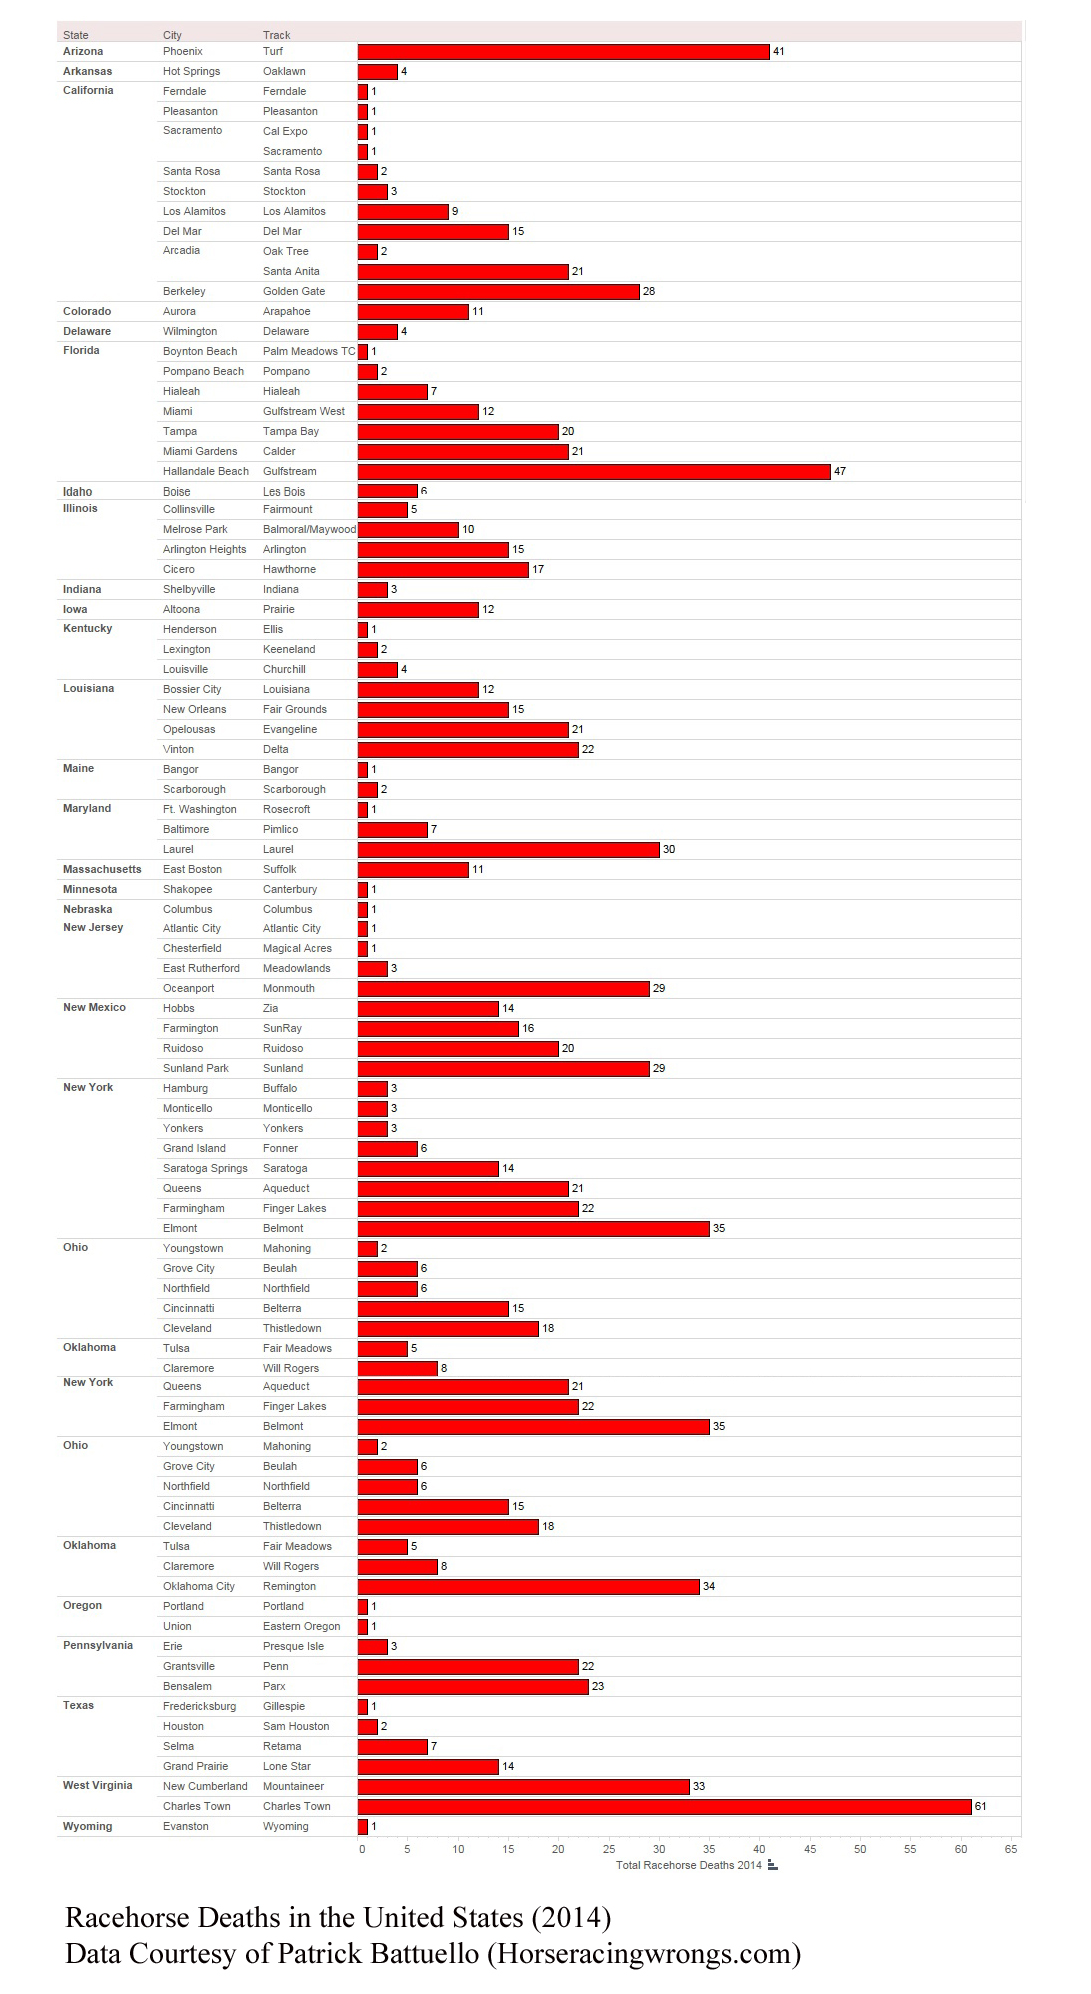

In [261]:
#Reading the image to be displayed. Code courtesy of:
#https://stackoverflow.com/questions/11854847/how-can-i-display-an-image-from-a-file-in-jupyter-notebook

from IPython.display import Image
Image(filename='horse-racing-deaths-2014.jpg') 

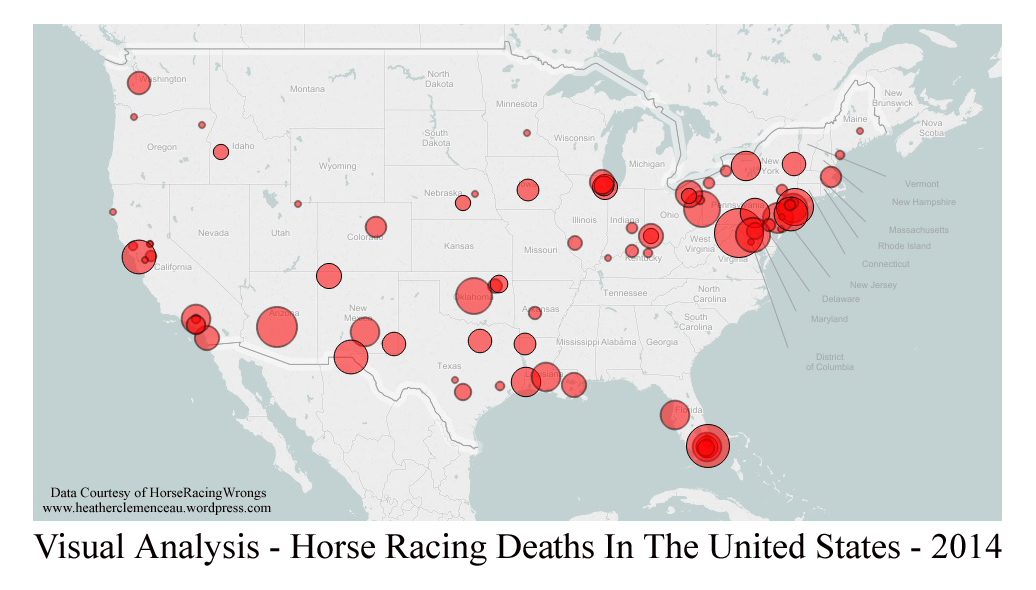

In [262]:
#Again, I referenced the previous code to read the image:
#https://stackoverflow.com/questions/11854847/how-can-i-display-an-image-from-a-file-in-jupyter-notebook

from IPython.display import Image
Image(filename='horse-racing-deaths-visual-analysis (1).jpg') 

Sources:

Datasets-
https://data.illinois.gov/dataset/549irb_2011_monthly_amounts_wagered_at_illinois_racetracks_otb_parlors_and_advance_deposit_wagering

https://data.illinois.gov/dataset/540illinois_racing_board_2012_monthly_amounts_wagered_at_illinois_racetracks_otb_parlors_and_advance

Horse Racing Deaths Visualizations-
https://heatherclemenceau.files.wordpress.com/2015/06/horse-racing-deaths-visual-analysis.jpg
 
https://heatherclemenceau.files.wordpress.com/2015/06/horse-racing-deaths-2014.jpg
